## Quick Start ##

This notebook will step through some cool ways to work with your molecule database

One thing to note.  There are lots of ways to customize jupyter notebooks and the ipython kernel.  In this case, I am avoiding any of that awesome magic and instead I am writing out all the setup explicitly here in the notebook itself.  The only special config in the notebook_config.py file is to start the notebook in the 'notebooks' directory

In [1]:
import os
import sys
import django
import pprint
import pandas as pd

# setup the djhango settings file.  Change this to use the settings file that connects you to your desired database
os.environ["DJANGO_SETTINGS_MODULE"] = "djangochem.settings.denntest"
# this must be run to setup access to the django settings and make database access work etc.
django.setup()

# import the models that you want to access
from pgmols.models import Mol, Calc, Geom
from jobs.models import Job, JobConfig

# this is all setup for the notebook
from IPython.display import HTML
import matplotlib
%matplotlib inline
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools # headsup: this import change the behavior of dataframes with mols in them
# some global configuration of the pandastools
PandasTools.molRepresentation = 'svg'
PandasTools.molSize = (200,200)

In [2]:
# this is a little helper function to render images inside a dataframe
# once again, there are ways to monkey patch the rendering of dataframes, but I am trying to 
# avoid most of that to make things a bit easier to understand

def show(df):
    return HTML(df.to_html(escape=False))

Now we can have some fun

In [3]:
dfm = pd.read_csv('/home/denn/harvard/SF/Library/single_fision_calibration_RPA.csv')
dfm['mol']=dfm.smiles.apply(Chem.MolFromSmiles)

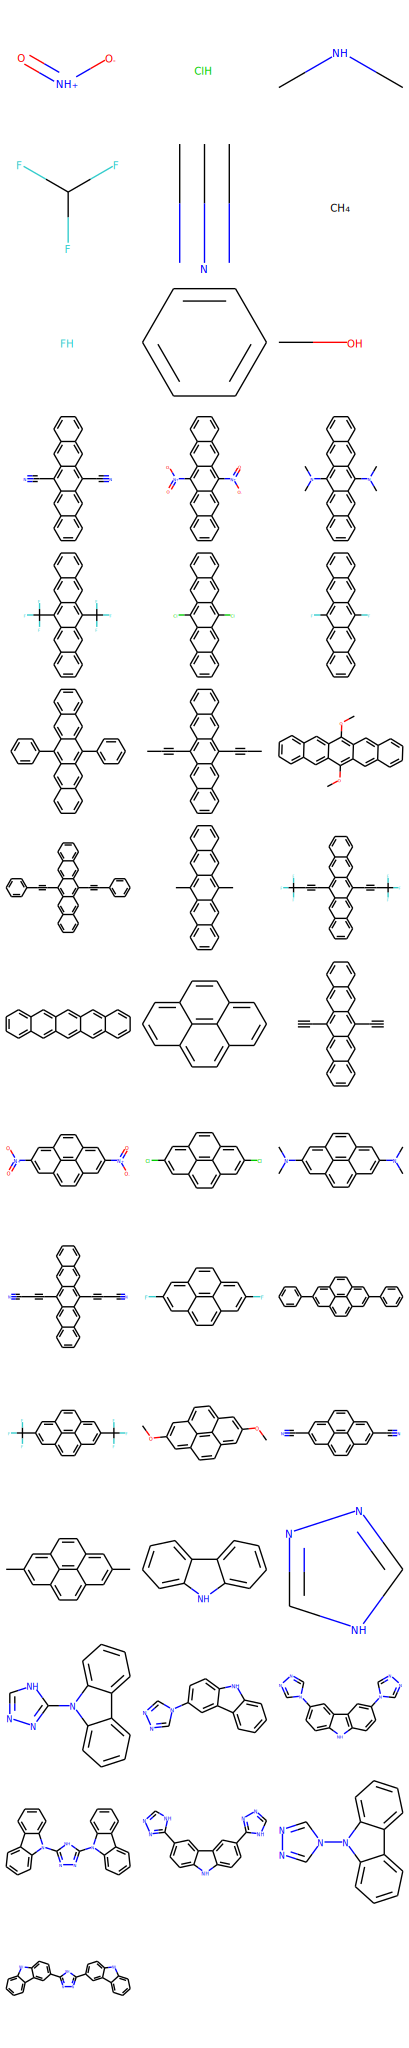

In [4]:
# builtin rdkit tools to view mols
Draw.MolsToGridImage([m['mol'] for m in mol_dicts], molsPerRow=3)

In [6]:
# we can make a pandas dataframe directly from the list of dicts
#df = pd.DataFrame(mol_dicts)
# specify the columns you want to see
dfm['triplet'] = dfm['absorption']-dfm['splitting']
dfm['s0_2t1'] = dfm['absorption']-2*dfm['triplet']
cols = ['inchi_key','mol', 'absorption', 'triplet','s0_2t1']
show(dfm[cols])  # show is defined at top of notebook
#dfm[cols].to_html(open('sf_bench.html', 'w'),escape=False)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>inchi_key</th>
      <th>mol</th>
      <th>absorption</th>
      <th>triplet</th>
      <th>s0_2t1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>DYPJXYFSUXVLNU-UHFFFAOYSA-N</td>
      <td><svg baseProfile="full" height="200px" version="1.1" width="200px" xml:space="preserve" xmlns:rdkit="http://www.rdkit.org/xml" xmlns:svg="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<rect height="200" style="opacity:1.0;fill:#FFFFFF;stroke:none" width="200" x="0" y="0"> </rect>\n<path d="M 12.5227,190.909 30.0181,160.606" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 30.0181,160.606 12.5227,130.303" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 33.4544,152.562 21.2076,131.349" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 30.0181,160.606 65.0091,160.606" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 35.2668,153.608 59.7604,153.608" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 12.5227,130.303 30.0181,100" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 21.2076,129.257 33.4544,108.045" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 30.0181,100 12.5227,69.697" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 33.4544,91.9555 21.2076,70.7433" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 30.0181,100 65.0091,100" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 35.2668,106.998 59.7604,106.998" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 12.5227,69.697 30.0181,39.3939" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 21.2076,68.6506 33.4544,47.4385" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 30.0181,39.3939 12.5227,9.09091" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 30.0181,39.3939 65.0091,39.3939" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 35.2668,46.3921 59.7604,46.3921" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 65.0091,39.3939 82.5045,69.697" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 61.5728,47.4385 73.8196,68.6506" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;stroke-dasharray:6,6"/>\n<path d="M 82.5045,69.697 117.495,69.697" style="fill:none;fill-rule:evenodd;stroke:#0

In [6]:
# and once we are in a dataframe, we get csv output for free!
csvcols = ['smiles', 'mass', 'stoichiometry']
df[csvcols].to_csv('output.csv')